<a href="https://colab.research.google.com/github/jeffreyboschman/basic_ml_with_numpy/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

#https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])
dx = 0.005

class knn():
    def __init__(self, ref_features, ref_labels):
        '''Initializes the k-nn classifier based on a ref_features matrix and the corresponding class labels for each point in ref_features.
        
        ref_features is an array with size (n,d), where n is the number of points (rows) and d is the number of features that each point has
        ref_labels is an array of integers with size (n), so there is an integer representing a class label for each point (row) of ref_features
        '''
        
        self.ref_features = np.array(ref_features)
        self.ref_labels = np.array(ref_labels)
        assert ref_features.shape[0] == ref_labels.shape[0], f"The size of the first dimension of ref_features {ref_features.shape[0]} does \
        not equal the size of the first dimension of ref_labels {ref_labels.shape[0]}"

    def get_predictions(self, k, test_features):
        '''Calculates the predicted classes of the points (rows) of test_features according to the k nearest points (rows) in ref_features.
        
        k is a user-defined constant that determines how many points in the ref_features matrix will determine the class of a point in 
            test_features (the class of the majority of the k nearest ref_features points will determine the class of the test_features point)
        test_features is an array of points that we want to classify with size (m,d) (i.e. same number of features d as ref_features)
        '''
        test_features = np.array(test_features)
        assert test_features.shape[1] == self.ref_features.shape[1], f"The number of features of test_features {test_features.shape[1]} does equal the number of dimensions of ref_features {self.ref_features.shape[1]}"  
        k = int(k)
        _ref_features = np.expand_dims(self.ref_features, axis=1) #shape (n, 1, d)
        _test_features = np.expand_dims(test_features, axis=0) #shape (1, m, d)
        distances = np.linalg.norm(_ref_features - _test_features, axis=2, ord=2) #shape (n,m)
        top_k_indices = distances.argsort(axis = 0)[:k] #shape (k,m)
        top_k_classes = np.take(self.ref_labels, top_k_indices).astype(int) #shape (k,m)
        pred_classes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), 0, top_k_classes) #shape (m,)

        return pred_classes

    def plot_2d_knn(self, k, test_features = None):
        '''Visualizes the ref_features points (as circles) on a 2d graph and plots the k-nn decision boundary based on the ref_features and k 
        (Note: only works if ref_features has only 2 features). 
        If given, also plots the points of test_features (as stars).'''

        assert self.ref_features.shape[1] == 2, f"This visualizer can only plot a 2d graph, but your ref_features matrix has {self.ref_features.shape[1]} features"
        
        k = int(k)
        x_min, x_max = self.ref_features[:, 0].min() - 0.1, self.ref_features[:, 0].max() + 0.1
        y_min, y_max = self.ref_features[:, 1].min() - 0.1, self.ref_features[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                             np.arange(y_min, y_max, dx))
        background_preds = self.get_predictions(k, np.c_[xx.ravel(), yy.ravel()])
        background_preds = background_preds.reshape(xx.shape)

        fig, ax = plt.subplots()
        plt.pcolormesh(xx,yy, background_preds, cmap=cmap_light)
        plt.scatter(self.ref_features[:, 0], self.ref_features[:, 1], c=self.ref_labels, cmap=cmap_bold, edgecolor='k', s=20)
        if test_features is not None:
            test_features = np.array(test_features)
            test_preds = self.get_predictions(k, test_features)
            plt.scatter(test_features[:, 0], test_features[:, 1], c=test_preds, cmap=cmap_bold, marker = '*', edgecolor='k', s=50)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        class_1 = mpatches.Patch(color='#FF0000', label='Class 1')
        class_2 = mpatches.Patch(color='#0000FF', label='Class 2')
        plt.legend(handles=[class_1, class_2])
        plt.show


In [99]:
test_points = [[0.4, 0.5],
               [0.1, 0.1],
               [0.2, 0.2]]
test_points = np.array(test_points)

ref_dataset = [[0.1, 0.1, 0],
               [0.3, 0.1, 0],
               [0.2, 0.1, 0],
               [0.1, 0.4, 0],
               [0.2, 0.3, 0],
               [0.4, 0.5, 1],
               [0.5, 0.6, 1],
               [0.7, 0.7, 1],
               [0.7, 0.1, 1],
               [0.2, 0.4, 0],
               [0.3, 0.3, 1],
               [0.7, 0.7, 0],
               [0.45, 0.8, 1],
               [0.9, 0.1, 1],
               [0.9, 0.9, 0],
               [0.3, 0.25, 1]]
ref_np = np.array(ref_dataset)
ref_xy = ref_np[:,0:2]
ref_class = ref_np[:,2]

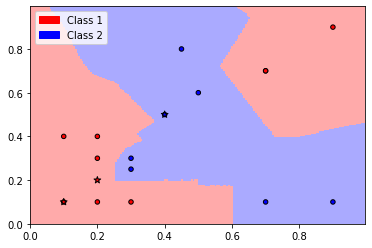

In [101]:
knn1 = knn(ref_xy, ref_class)
knn1.plot_2d_knn(2, test_points)

In [38]:
#!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data" -O breast_cancer_wisconsin.csv